# IKr GA Fitting

GA Trial 5
*************************************************************************************
Progress: --------------> 83.33333333333334 %
generation:  0
Runtime:  0.07239095076608161 mins
Best fitness:  0.1631429173761706
generational solution:  [2.02704999e-02 2.02157294e+01 1.07719654e+01 3.09977847e+01
 1.77955150e+01 8.33936763e-01 3.22091843e-02 1.59861593e+01
 8.94339113e-04 2.65293461e+01 4.36923923e-03 1.67922987e+01
 1.60306612e-04 2.10676544e+01 9.95220203e-02 5.46874058e+01
 6.39639690e-01 1.00136419e+02]


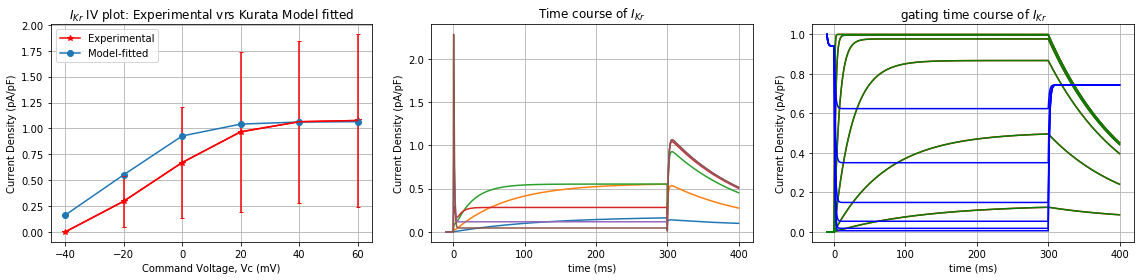

generation:  10
Runtime:  0.9450174976838752 mins
Best fitness:  0.04544554325631648
generational solution:  [1.71912190e-02 1.46214111e+01 1.13742782e+01 2.91706342e+01
 1.43508081e+01 7.64607526e-01 3.13611253e-02 1.34363761e+01
 8.76179708e-04 2.59858469e+01 3.18067827e-03 1.68117036e+01
 1.28499616e-04 2.10635036e+01 8.06113863e-02 6.45427467e+01
 7.75992280e-01 8.30725977e+01]


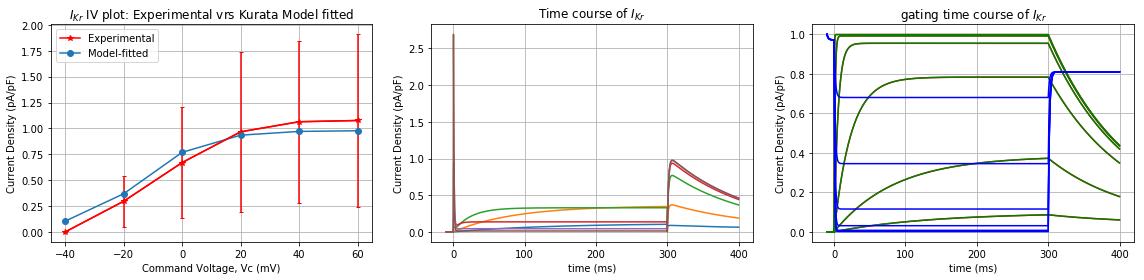

generation:  20
Runtime:  1.8802572082805757 mins
Best fitness:  0.025172900386205024
generational solution:  [1.73148535e-02 1.25670896e+01 1.04980497e+01 2.86617663e+01
 1.37097499e+01 7.04791553e-01 3.25469127e-02 1.14479175e+01
 7.40698004e-04 2.66954970e+01 3.58097469e-03 1.64955575e+01
 1.15607854e-04 2.04759587e+01 7.36370773e-02 5.51549717e+01
 7.58847283e-01 8.29354053e+01]


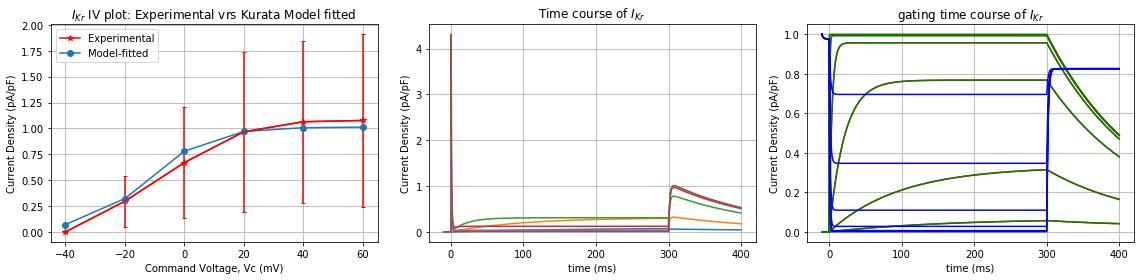

generation:  30
Runtime:  2.8835281221972155 mins
Best fitness:  0.013508938441404779
generational solution:  [1.68994546e-02 1.00958388e+01 1.07314406e+01 2.67653482e+01
 1.26759549e+01 6.71068700e-01 2.91871711e-02 1.12869928e+01
 6.93651396e-04 2.55710009e+01 3.61886209e-03 1.87671674e+01
 1.20561241e-04 2.07106929e+01 6.60121545e-02 4.80321076e+01
 7.77646873e-01 8.97860433e+01]


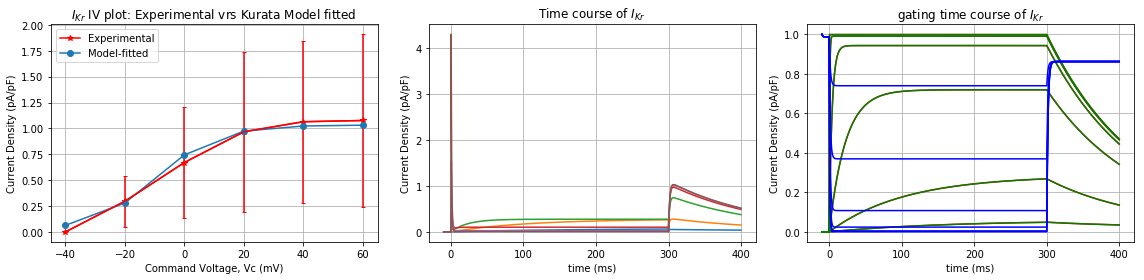

generation:  40
Runtime:  4.137449288546729 mins
Best fitness:  0.00995973791907
generational solution:  [1.80357775e-02 9.40197072e+00 1.21568865e+01 2.77586331e+01
 1.47987444e+01 7.31290977e-01 2.58344766e-02 1.07554507e+01
 7.56558484e-04 2.87376720e+01 3.73961656e-03 1.85023730e+01
 1.27274579e-04 1.92036754e+01 7.21429672e-02 4.68735279e+01
 8.59256446e-01 8.80949773e+01]


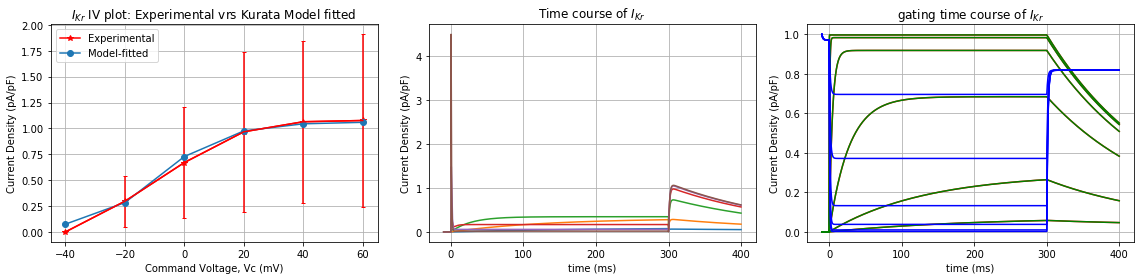

generation:  50
Runtime:  5.585460135767547 mins
Best fitness:  0.007583205325082098
generational solution:  [1.81720111e-02 8.55593152e+00 1.18137303e+01 2.92229630e+01
 1.43235425e+01 6.77161561e-01 2.87181063e-02 1.09300615e+01
 6.73163505e-04 2.92019270e+01 3.68216393e-03 1.65388082e+01
 1.24500491e-04 1.93282230e+01 7.15775742e-02 4.72513688e+01
 9.55549588e-01 8.39824724e+01]


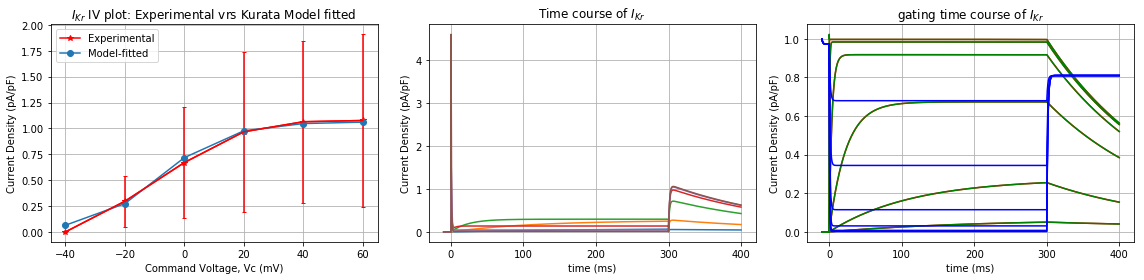

generation:  60
Runtime:  7.170655084750615 mins
Best fitness:  0.006160713957418911


In [ ]:
import timeit
import numpy as np
import matplotlib.pyplot as plt
import IKr_worker
from multiprocessing import Pool
from sklearn.metrics import r2_score
import pickle
import warnings
warnings.filterwarnings('ignore')

Runtime_arr = []
class GA_trial:
    gen_num = 0
    loss = 0
    R_sq_ini = 0
    R_sq_fin = 0
    Parameters = 0
    final_fit_Val = 0
    time = 0
    cur_time_fit = 0
    cur_time_ini = 0
    Vcm = 0
    I_peaks_fin = 0
    I_peaks_ini = 0
    Runtime = 0

ini_par = np.array([0.8*0.025, 23.2, 10.6, 28.6, 17.1, 0.84655,
                    0.0372, 15.9, 0.00096, 22.5, 0.0042, 17.0, 0.00015, 21.6, 0.1, 54.645, 0.656, 106.157])
IKr_IVini = IKr_worker.IKr_func(ini_par)
time_ini, plt_IKr_ini, paS_ini, paF_ini, pi_ini = IKr_worker.IKr_func_time(ini_par)


timer_start = timeit.default_timer()

V = np.arange(-40, 61, 20)

IKr_act = np.array(
    [0.0000, 0.296491453, 0.670409, 0.967468331, 1.064629846, 1.076653804 ])
IKr_err = np.array([0.000, 0.246868565, 0.539902624, 0.771099748, 0.782198549, 0.832950241])
 

# fitness
def pop_fitness(ppln):
        p = Pool(processes = 28)
        gen_start_time_parlel = timeit.default_timer()
        IKr_cur = p.map(IKr_worker.IKr_func, ppln)
        gen_finish_time_parlel = timeit.default_timer()
        #print('generation runtime (parallel) = ',(gen_finish_time_parlel - gen_start_time_parlel)/60, 'mins')    
        SSE = np.sum(np.power((IKr_cur - IKr_act), 2, dtype=np.float64), axis=1)
        return SSE

def select_mating_pool(popn, fitness, num_parents):
    parents = np.empty((num_parents, popn.shape[1]))
    for parent_no in range(num_parents):
        max_fit_idx = np.where(fitness == np.min(fitness))  # find max and return its index
        max_fit_idx = max_fit_idx[0][0]  # Select the first index if repetitive
        parents[parent_no, :] = popn[max_fit_idx, :]
        fitness[max_fit_idx] = +9999999999999
    return parents

# 2-point crossover
def crossover(parents,
              offspring_size):  # in the case offspring size = (k, 3) where k is the number of desired offsprings
    offspring = np.empty(offspring_size)
    crossover_point1 = np.uint8(np.random.randint(1, offspring_size[1]/2))
    crossover_point2 = np.uint8(np.random.randint(offspring_size[1]/2, offspring_size[1]))

    for n in range(parents.shape[0]):
        # parent selection
        parent1_idx = n % parents.shape[0]  # using modulus helps implement a ring parent selection fashion
        parent2_idx = (n + 1) % parents.shape[0]
        offspring[n, 0:crossover_point1] = parents[parent1_idx, 0:crossover_point1]
        offspring[n, crossover_point1:crossover_point2] = parents[parent2_idx, crossover_point1:crossover_point2]
        offspring[n, crossover_point2:] = parents[parent1_idx, crossover_point2:]
        #second offspring
        offspring[n + parents.shape[0], 0:crossover_point1] = parents[parent1_idx, 0:crossover_point1]
        offspring[n + parents.shape[0], crossover_point1:]  = parents[parent2_idx, crossover_point1:]
        
    return offspring

def mutation(offspring_crossover):
    gen_alpha = np.random.uniform(0.0, 0.1)
#     print(gen_alpha)
    mutation_coeff = np.random.uniform(1-gen_alpha, 1+gen_alpha, (offspring_crossover.shape[0], offspring_crossover.shape[1]))
    mutants = mutation_coeff*offspring_crossover # various percentage of the parameters
#     mutants = mutation_coeff*best_par # various percentage of the parameters
    return mutants

pop_size = 25

num_of_trials = 6

for trial_count in np.arange(5, num_of_trials): #for loop repeat GA process for data logging
    timer_start = timeit.default_timer()
    C = np.empty((pop_size, len(ini_par)))
    pop_alpha = np.random.uniform(0.0, 0.2, C.shape[1])
    for i in range(C.shape[1]):
        C[:, i] = np.random.uniform((1 - pop_alpha[i])*ini_par[i], (1 + pop_alpha[i])*ini_par[i], C.shape[0])

    IKr = np.empty((C.shape[0], len(V)))
    population = C  # initial Population

    print('GA Trial %s' %trial_count)
    print('*************************************************************************************')
    progress = trial_count/(num_of_trials)*100
    print('Progress: --------------> %s'%progress, '%')

    i_plt = 0
    gen_mod = 10
    num_of_gens = 101
    no_plts = num_of_gens/gen_mod
    no_plts = np.int16(no_plts)
    gen_curr_arr = np.zeros((len(V), num_of_gens))
    num_mating_parents = int(C.shape[0]/5)
    best_gen_fitness = []

    for generation in range(num_of_gens):
        fitness = pop_fitness(population)  # calculate fitness (SSE)
        #print(fitness)
        fitness = np.where(np.isnan(fitness), 1e120, fitness) #handles the dreaded nan's
        #fitness = np.where(np.isinf(fitness), 0, fitness)
        best_gn_fit_idx = np.where(fitness == np.min(fitness))
        indx = best_gn_fit_idx[0][0]
        best_gen_fitness.append(fitness[indx])

        if generation%gen_mod == 0:
            best_gn_fit_idx = np.where(fitness == np.min(fitness))
            indx = best_gn_fit_idx[0][0]
            gen_num = np.arange(len(best_gen_fitness))
            timer_stop = timeit.default_timer()
            print('generation: ', generation)
            Rtime = (timer_stop - timer_start)/60.0
            print('Runtime: ', Rtime , 'mins')
            print('Best fitness: ', fitness[indx])
            Runtime_arr.append(Rtime)

            y_fit = IKr_worker.IKr_func(population[indx,:])
            time, plot_IKr_fit, paF, paS, pi = IKr_worker.IKr_func_time(population[indx,:])
            gen_curr_arr[:, i_plt] = y_fit
            print('generational solution: ',population[indx, :])
            plt.figure(figsize=(16,4))
            plt.subplot(131)
            plt.plot(V, IKr_act, 'r-*', V, y_fit, '-o')
            plt.legend(['Experimental', 'Model-fitted'], loc='best')
            plt.errorbar(V, IKr_act, yerr=IKr_err, capsize=2, color='red')
            plt.xlabel('Command Voltage, Vc (mV)')
            plt.ylabel('Current Density (pA/pF)')
            plt.title('$I_{Kr}$ IV plot: Experimental vrs Kurata Model fitted')
            plt.grid()

            plt.subplot(132)
            plt.grid()
            plt.plot(time, plot_IKr_fit)
            plt.xlabel('time (ms)')
            plt.ylabel('Current Density (pA/pF)')
            plt.legend(loc='lower right')
            plt.title('Time course of $I_{Kr}$')

            plt.subplot(133)
            plt.grid()
            plt.plot(time, paF, '-r')
            plt.plot(time, paS, '-g')
            plt.plot(time, pi, '-b')
            plt.xlabel('time (ms)')
            plt.ylabel('Current Density (pA/pF)')
            plt.legend(loc='lower right')
            plt.title('gating time course of $I_{Kr}$')
            plt.tight_layout()
            plt.show()
            
        if generation == num_of_gens-1:
            Best_Sol = population[indx, :]
            final_fitness = fitness[indx]
            print('-------------------------------------------------------------------')
            print('Best Solution: ', Best_Sol)
            print('Final Fitness: ', final_fitness)
            ini_r2 = r2_score(IKr_act, IKr_IVini)
            fit_r2 = r2_score(IKr_act, y_fit)


        parents = select_mating_pool(population, fitness, num_mating_parents)  # choose mating parents based on best min SSE
        offspring_crossed = crossover(parents, offspring_size=(2*parents.shape[0], population.shape[1]))
        offspring_mutated = mutation(offspring_crossed)
        population[0:parents.shape[0], :] = parents
        population[parents.shape[0]: 3 * parents.shape[0], :] = offspring_crossed
        population[3 * parents.shape[0]:, :] = offspring_mutated

        i_plt = i_plt + 1

    timer_stop = timeit.default_timer()        
    print('Total Runtime: ', (timer_stop - timer_start)/60.0, 'mins')

    gen_num = np.arange(len(best_gen_fitness))

    #fitted model
    IKr_IVfit = IKr_worker.IKr_func(Best_Sol)
    time_fit, plt_IKr_fit, paF_fit, paS_fit, pi_fit = IKr_worker.IKr_func_time(Best_Sol)
    print('ini_r2: ', ini_r2)
    print('fit_r2: ', fit_r2)

    GA_trial_n = GA_trial()
    GA_trial_n.gen_num = gen_num
    GA_trial_n.loss = best_gen_fitness
    GA_trial_n.final_fit_val = final_fitness
    GA_trial_n.R_sq_ini = ini_r2
    GA_trial_n.R_sq_fin = fit_r2
    GA_trial_n.Parameters = Best_Sol
    GA_trial_n.time = time
    GA_trial_n.cur_time_ini = plt_IKr_ini
    GA_trial_n.cur_time_fit = plt_IKr_fit
    GA_trial_n.Vcm = V
    GA_trial_n.gen_fit_arr = gen_curr_arr
    GA_trial_n.I_peaks_fin = y_fit
    GA_trial_n.I_peaks_ini = IKr_IVini
    GA_trial_n.Runtime = Runtime_arr

    pickle.dump(GA_trial_n, open('IKr_GA_trial_n%s.p' %trial_count, 'wb'))

    gen_num = np.arange(len(best_gen_fitness))
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.plot(gen_num, best_gen_fitness)
    plt.yscale('log')
    plt.xlabel('number of generations')
    plt.ylabel('Loss: Sum of Squared Error (log scale)')
    plt.grid()

    plt.subplot(122)
    plt.plot(V, IKr_act, 'b-o', label = 'expt')
    plt.errorbar(V, IKr_act, yerr=IKr_err, capsize=2, label = 'Expt', color = 'red')
    for cnt in np.arange(0,gen_curr_arr.shape[1], gen_mod):
        plt.plot(V, gen_curr_arr[:, cnt], '-*', label='gen %s' %cnt)

    plt.xlabel('Transmembrane Voltage, $V_m$ (mV)')
    plt.ylabel('Current Density (pA/ pF)')
    plt.title('$I_{Kr}$ IV plots - Experimental vs multiple generations')
    plt.grid()
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(16,4))
    plt.subplot(131)
    plt.plot(V, IKr_act, 'r-*', V, IKr_IVfit, '-o')
    plt.legend(['Experimental', 'Model-fitted'], loc='best')
    plt.errorbar(V, IKr_act, yerr=IKr_err, capsize=2, color='red')
    plt.xlabel('Command Voltage, Vc (mV)')
    plt.ylabel('Current Density (pA/pF)')
    plt.title('$I_{Kr}$ IV plot: Experimental vrs Kurata Model fitted')
    plt.grid()

    plt.subplot(132)
    plt.grid()
    plt.plot(time, plt_IKr_fit)
    plt.xlabel('time (ms)')
    plt.ylabel('Current Density (pA/pF)')
    plt.legend(loc='lower right')
    plt.title('Time course of $I_{Kr}$')

    plt.subplot(133)
    plt.grid()
    plt.plot(time, paF_fit, '-r')
    plt.plot(time, paS_fit, '-g')
    plt.plot(time, pi_fit, '-b')
    plt.xlabel('time (ms)')
    plt.ylabel('Current Density (pA/pF)')
    plt.legend(loc='lower right')
    plt.title('gating time course of $I_{Kr}$')
    plt.tight_layout()
    plt.show()

## Analysis

Parameters_______
0:  [2.19292488e-02 6.33563575e+00 1.18553281e+01 4.51208052e+01
 1.56947407e+01 7.61558475e-01 3.28185643e-02 2.10946497e+01
 8.39286120e-04 2.25541131e+01 4.21864218e-03 1.12978594e+01
 1.47872985e-04 1.94156093e+01 8.03986036e-02 6.87886086e+01
 6.92013335e-01 1.15777248e+02]
1:  [1.86484701e-02 6.42652882e+00 1.18799783e+01 4.01163188e+01
 1.40822232e+01 9.63756681e-01 4.23722972e-02 1.70356140e+01
 1.24135620e-03 2.33474212e+01 4.56822754e-03 1.46185713e+01
 1.71859133e-04 1.73714985e+01 8.47065470e-02 5.21505971e+01
 7.59956413e-01 1.07977148e+02]
2:  [1.84217369e-02 6.79141817e+00 1.26520628e+01 4.05331467e+01
 1.60252582e+01 1.02364786e+00 3.44385677e-02 1.39353864e+01
 6.72920731e-04 3.31604113e+01 4.45443389e-03 2.30960156e+01
 1.30158811e-04 2.32741585e+01 8.99700255e-02 5.53946219e+01
 5.16633631e-01 1.23366794e+02]
3:  [1.94262561e-02 6.54364126e+00 1.13123346e+01 4.31414962e+01
 1.63711551e+01 1.01798555e+00 3.67123500e-02 1.93800768e+01
 7.49864392e-04 

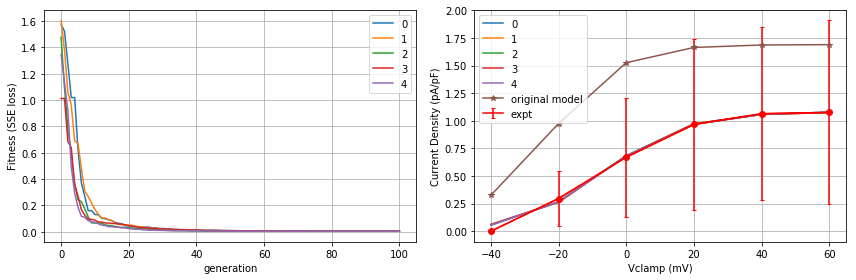

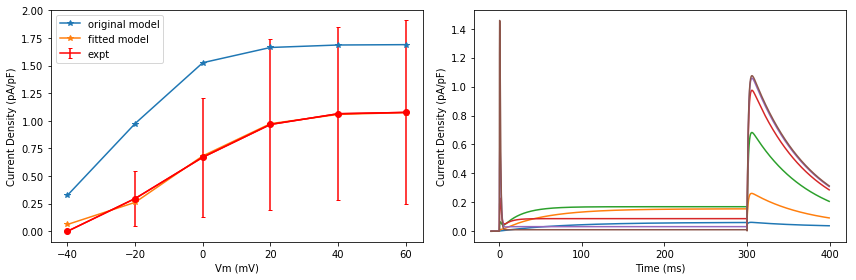

[0.05274667556708058, 0.6701604348995412, 1.3613529692015922, 2.124020027865966, 3.0695449370813246, 4.136058096735117, 5.459339687530883, 6.989538471781028, 8.877696415331835, 11.16146270444927, 13.8823537828944]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import IKr_worker

Vcm = np.arange(-40, 61, 20)
ini_par = np.array([0.025, 23.2, 10.6, 28.6, 17.1, 0.84655,
                    0.0372, 15.9, 0.00096, 22.5, 0.0042, 17.0, 0.00015, 21.6, 0.1, 54.645, 0.656, 106.157])
IKr_act = np.array(
    [0.0000, 0.296491453, 0.670409, 0.967468331, 1.064629846, 1.076653804 ])
IKr_err = np.array([0.000, 0.246868565, 0.539902624, 0.771099748, 0.782198549, 0.832950241])

IKr_pks_ini = IKr_worker.IKr_func(ini_par)
time, plot_IKr_ini, paF_ini, paS_ini, pi_ini = IKr_worker.IKr_func_time(ini_par)

class GA_trial:
    gen_num = 0
    loss = 0
    R_sq_ini = 0
    R_sq_fin = 0
    Parameters = 0
    final_fit_Val = 0
    time = 0
    cur_time_fit = 0
    cur_time_ini = 0
    Vcm = 0
    gen_fit_arr = 0
    I_peaks_fin = 0
    I_peaks_ini = 0
    Runtime = 0
    
GA0 = pickle.load(open('IKr_GA_trial_n0.p', 'rb'))
GA1 = pickle.load(open('IKr_GA_trial_n1.p', 'rb'))
GA2 = pickle.load(open('IKr_GA_trial_n2.p', 'rb'))
GA3 = pickle.load(open('IKr_GA_trial_n3.p', 'rb'))
GA4 = pickle.load(open('IKr_GA_trial_n4.p', 'rb'))

print('Parameters_______')
print('0: ', GA0.Parameters)
print('1: ', GA1.Parameters)
print('2: ', GA2.Parameters)
print('3: ', GA3.Parameters)
print('4: ', GA4.Parameters)
print('\n')

print('R_sq_____')
print('0: ', GA0.R_sq_fin)
print('1: ', GA1.R_sq_fin)
print('2: ', GA2.R_sq_fin)
print('3: ', GA3.R_sq_fin)
print('4: ', GA4.R_sq_fin)
print('\n')

trials_r2 = np.array([GA0.R_sq_fin, GA1.R_sq_fin, GA2.R_sq_fin, GA3.R_sq_fin, GA4.R_sq_fin])

r2_mean = np.mean(trials_r2)
r2_stdv = np.std(trials_r2)

loss_ini = np.array([GA0.loss[0], GA1.loss[0], GA2.loss[0], GA3.loss[0], GA4.loss[0]])

loss_fin = np.array([GA0.loss[-1], GA1.loss[-1], GA2.loss[-1], GA3.loss[-1], GA4.loss[-1]])

loss_ini_mean = np.mean(loss_ini)
loss_ini_stdv = np.std(loss_ini)

loss_fin_mean = np.mean(loss_fin)
loss_fin_stdv = np.std(loss_fin)

print('R_sq:______')
print('Initial R2: ', GA1.R_sq_ini)
print('Initial R2: ', GA2.R_sq_ini)

print('mean R_sq: ', r2_mean)
print('std R_sq: ', r2_stdv)

print('initial losses:______\n ', loss_ini)
print('mean initial loss: ', loss_ini_mean)
print('std initial loss: ', loss_ini_stdv)

print('final losses:______\n ', loss_fin)
print('mean final loss: ', loss_fin_mean)
print('std final loss: ', loss_fin_stdv)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(GA0.gen_num, GA0.loss, label = '0')
plt.plot(GA1.gen_num, GA1.loss, label = '1')
plt.plot(GA2.gen_num, GA2.loss, label = '2')
plt.plot(GA3.gen_num, GA3.loss, label = '3')
plt.plot(GA4.gen_num, GA4.loss, label = '4')
plt.grid()
# plt.yscale('log')
plt.xlabel('generation')
plt.ylabel('Fitness (SSE loss)')
plt.legend()


plt.subplot(122)
plt.grid()
plt.plot(GA0.Vcm, GA0.I_peaks_fin, label='0')
plt.plot(GA1.Vcm, GA1.I_peaks_fin, label='1')
plt.plot(GA2.Vcm, GA2.I_peaks_fin, label='2')
plt.plot(GA3.Vcm, GA3.I_peaks_fin, label='3')
plt.plot(GA4.Vcm, GA4.I_peaks_fin, label='4')
plt.plot(Vcm, IKr_pks_ini, '-*', label='original model')
plt.errorbar(Vcm, IKr_act, yerr=IKr_err, capsize=2, color='red', label = 'expt')
plt.xlabel('Vclamp (mV)')
plt.ylabel('Current Density (pA/pF)')
plt.legend()
plt.plot(Vcm, IKr_act, 'r-o')
plt.tight_layout()
# plt.savefig('IKr_multi_gen_loss.png')
plt.show()

time, plt_IKr_fit, paF_fit, paS_fit, pi_fit = IKr_worker.IKr_func_time(GA0.Parameters)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(Vcm, IKr_pks_ini, '-*', label='original model')
plt.plot(Vcm, GA0.I_peaks_fin, '-*', label='fitted model')
plt.errorbar(Vcm, IKr_act, yerr=IKr_err, capsize=2, color='red', label = 'expt')
plt.legend()
plt.xlabel('Vm (mV)')
plt.ylabel('Current Density (pA/pF)')
plt.plot(Vcm, IKr_act, 'r-o')

plt.subplot(122)
plt.plot(time, plt_IKr_fit)
plt.xlabel('Time (ms)')
plt.ylabel('Current Density (pA/pF)')
plt.tight_layout()
# plt.savefig('IKr_IV_n_time.png')
plt.show()

print(GA0.Runtime)


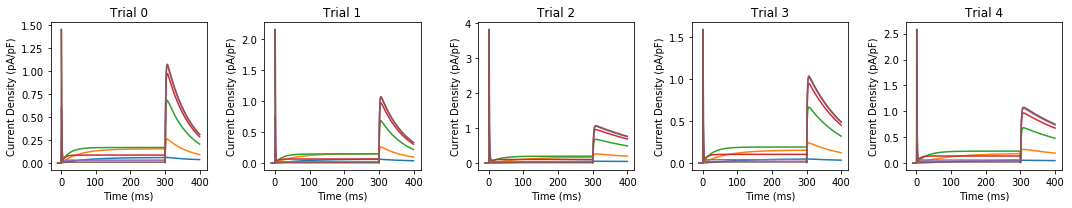

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,3))
# GA1.Parameters[-1] = GA0.Parameters[-1]
plt.subplot(151)
time_fit, plt_IKr_fit, paF_fit, paS_fit, pi_fit = IKr_worker.IKr_func_time(GA0.Parameters)
plt.plot(time_fit, plt_IKr_fit)
plt.xlabel('Time (ms)')
plt.ylabel('Current Density (pA/pF)')
plt.title('Trial 0')
plt.subplot(152)
time_fit, plt_IKr_fit, paF_fit, paS_fit, pi_fit = IKr_worker.IKr_func_time(GA1.Parameters)
plt.plot(time_fit, plt_IKr_fit)
plt.xlabel('Time (ms)')
plt.ylabel('Current Density (pA/pF)')
plt.title('Trial 1')
plt.subplot(153)
time_fit, plt_IKr_fit, paF_fit, paS_fit, pi_fit = IKr_worker.IKr_func_time(GA2.Parameters)
plt.plot(time_fit, plt_IKr_fit)
plt.xlabel('Time (ms)')
plt.ylabel('Current Density (pA/pF)')
plt.title('Trial 2')
plt.subplot(154)
time_fit, plt_IKr_fit, paF_fit, paS_fit, pi_fit = IKr_worker.IKr_func_time(GA3.Parameters)
plt.plot(time_fit, plt_IKr_fit)
plt.xlabel('Time (ms)')
plt.ylabel('Current Density (pA/pF)')
plt.title('Trial 3')
plt.subplot(155)
time_fit, plt_IKr_fit, paF_fit, paS_fit, pi_fit = IKr_worker.IKr_func_time(GA4.Parameters)
plt.plot(time_fit, plt_IKr_fit)
plt.xlabel('Time (ms)')
plt.ylabel('Current Density (pA/pF)')
plt.title('Trial 4')

plt.tight_layout()
plt.savefig('IKr_time_course_fits.png')
plt.show()